In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import sqlalchemy as sa
import RunData.MyaData as Mya
from RGA import *
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"
pio.renderers.default = 'jupyterlab'  # Alternate: 'browser' opens new browser window with plots.

# There were 3 run periods for RGA
run_sub_periods_available = [
        (datetime(2018, 2,  5, 20, 0), datetime(2018,  2,  8, 6, 0)),
        (datetime(2018, 9, 27,  1, 0), datetime(2018, 11, 26, 7, 0)),
        (datetime(2019, 3, 25, 18, 0), datetime(2019,  4, 15, 6, 0))
    ]
data = RunData(cache_file='RGA_jupyter.sqlite3', sqlcache=True)
data.debug = 2
data.fix_bad_rcdb_start_times = True

Imported the RGA info.
Setup 'data' with: data = RunData(cache_file='RGA.sqlite3', sqlcache=True)
Creating the run data cache.


## Select the run period
Set the selected_run_period for RGA from 0, 1 or 2.

In [2]:
# Select the run period you want to inspect from 0 to 2.
selected_run_period = 1
print(f"Selected data from run period {selected_run_period} from "
      f"{run_sub_periods_available[selected_run_period][0]:%Y-%m-%d} to {run_sub_periods_available[selected_run_period][1]:%Y-%m-%d}")

Selected data from run period 1 from 2018-09-27 to 2018-11-26


In [3]:
setup_rundata_structures(data, run_sub_periods_available[selected_run_period])

Fetching the data from 2018-09-27 01:00:00 to 2018-11-26 07:00:00
get_runs from 2018-09-27 01:00:00 - 2018-11-26 07:00:00 
cache_fill_runs: 2018-09-27 01:00:00 - 2018-11-26 07:00:00 minevt: 500000
Getting runs from RCDB: 2018-09-27 01:00:00 - 2018-11-26 07:00:00 minevt: 500000
Found 437 runs.

Getting runs from RCDB from 4862 to 5666
Run 4864 has no proper start time!!!
Run 4865 has no proper start time!!!
Run 4865 has no proper end time!!!
Run 4866 has no proper start time!!!
Run 4872 has no proper start time!!!
Run 4874 has no proper start time!!!
Run 4874 has no proper end time!!!
Run 4877 has no proper start time!!!
Run 4878 has no proper start time!!!
Run 4879 has no proper start time!!!
Run 4882 has no proper start time!!!
Run 4884 has no proper start time!!!
Run 4885 has no proper start time!!!
Run 4885 has no proper end time!!!
Run 4886 has no proper start time!!!
Run 4892 has no proper start time!!!
Run 4897 has no proper start time!!!
Run 4917 has no proper start time!!!
Run 

ConnectionError: [Errno Could not connect to ] https://epicsweb.jlab.org/myquery/interval

## Select the run number
For inspecting the run parameters below, choose a run number from the available runs.
You can either select the `i_run`, which is the nth +1 run in the data set and keep `run_number = None`, or you can set `run_number` which is the actual number of the run, but make sure this run_number is actually in the data set.

In [4]:
print("Runs available in this time span:")
print(f"i_run = {0:4d}  --> {data.All_Runs.iloc[0].name}")
print(f"i_run = {len(data.All_Runs)-1:4d}  --> {data.All_Runs.iloc[-1].name}")

Runs available in this time span:
i_run =    0  --> 4862
i_run =  464  --> 5665


In [7]:
# Select the run you want to inspect.
run_number = None
i_run = 4
if run_number is None:
    start_time = data.All_Runs.iloc[i_run].start_time
    end_time = data.All_Runs.iloc[i_run].end_time
    run_number = data.All_Runs.iloc[i_run].name
else:
    i_run = data.All_Runs.index.get_loc(run_number)
    start_time = data.All_Runs.loc[run_number].start_time
    end_time = data.All_Runs.loc[run_number].end_time
           
print(f"Run number = {run_number} index no = {i_run} start_time = {start_time}  end_time = {end_time}")

Run number = 4870 index no = 4 start_time = 2018-10-02 06:41:27  end_time = 2018-10-02 06:48:13


In [41]:
rafo_times1 = pd.read_csv("RunSummaryinfo_F18_Inb_Earlyruns.dat", names=["run_number","charge","t_start","t_end"], index_col=0)
rafo_times2 = pd.read_csv("RunSummaryinfo_F18inbend.dat",names=["run_number","charge","t_start","t_end"], index_col=0)
rafo_times1["start_time"] = rafo_times1.t_start.map(datetime.fromtimestamp)
rafo_times1["end_time"] = rafo_times1.t_end.map(datetime.fromtimestamp)
rafo_times2["start_time"] = rafo_times2.t_start.map(datetime.fromtimestamp)
rafo_times2["end_time"] = rafo_times2.t_end.map(datetime.fromtimestamp)

In [5]:
data.All_Runs

,start_time,end_time,is_valid_run_end,user_comment,run_type,target,beam_current_request,operators,event_count,events_rate,...,run_start_time,run_end_time,beam_energy,selected,IPM2C21A,B_DAQ:livetime_pulser,IPM2C21A_corr,charge,IPM2C21A_lumi,luminosity
number,,,,,,,,,,,,,,,,,,,,,
4862,2018-10-01 20:43:08,2018-10-01 22:49:07,0,None,None,empty,None,None,28877129,8054.2000,...,2018-10-01 20:43:08.000000,2018-10-01 22:49:07.000000,10604.1,False,NaN,NaN,NaN,NaN,NaN,NaN
4867,2018-10-02 00:05:47,2018-10-02 03:04:48,1,secto3 and sector4 has no trigger. FTOF sector...,PROD66,LH2,50nA,"expert: Jixie Zhang, worker: Torri Roark",55990422,5825.2900,...,2018-10-02 00:05:47.000000,2018-10-02 03:04:48.000000,10604.1,True,0.475095,1.058731e+09,0.469365,0.469365,591.012165,591.012165
4868,2018-10-02 03:11:05,2018-10-02 04:34:17,1,,PROD66,LH2,50na,"expert: Jixie Zhang, worker: Torri Roark",38616403,31.7986,...,2018-10-02 03:11:05.000000,2018-10-02 04:34:17.000000,10600.0,True,0.234860,4.607468e+08,0.218143,0.218143,274.679270,274.679270
4869,2018-10-02 04:39:30,2018-10-02 06:36:11,1,no sector 3,PROD66,LH2,50na,"expert: Jixie Zhang, worker: Torri Roark",46276563,153.7060,...,2018-10-02 04:39:30.000000,2018-10-02 06:36:11.000000,10600.0,True,0.299827,6.808310e+08,0.294710,0.294710,371.090659,371.090659
4870,2018-10-02 06:41:27,2018-10-02 06:48:13,1,no sector 3,PROD66,LH2,50na,"expert: Jixie Zhang, worker: Torri Roark",3235083,1767.1000,...,2018-10-02 06:41:27.000000,2018-10-02 06:48:13.000000,10604.1,True,0.021703,3.509497e+07,0.020785,0.020785,26.171554,26.171554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,2018-11-25 23:08:51,2018-11-25 23:18:00,0,,PROD66,LH2,50nA,"expert: Stepan Stepanyan, worker: Mikhail Bas...",3343181,3029.6000,...,2018-11-25 23:08:51.000000,2018-11-25 23:18:00.000000,10604.1,True,0.019113,3.155082e+07,0.009636,0.009636,12.133190,12.133190
5662,2018-11-25 23:23:51,2018-11-26 01:05:53,1,One magnet down in the accelerator / stop run,PROD66,LH2,50 nA,"expert: Stepan Stepanyan, worker: Mikhail Bas...",87789956,285.6890,...,2018-11-25 23:23:51.000000,2018-11-26 01:05:53.000000,10604.1,True,0.251721,5.488135e+08,0.237704,0.237704,299.309876,299.309876
5663,2018-11-26 01:15:56,2018-11-26 03:05:49,1,,PROD66,LH2,50nA,"expert: Eric Voutier, worker: Mikhail Bashkanov",100086887,3417.2100,...,2018-11-26 01:15:56.000000,2018-11-26 03:05:49.000000,10604.1,True,0.286478,6.223520e+08,0.271506,0.271506,341.872802,341.872802


In [18]:
# Initialize the data for the FCUP. We get the entire period because otherwise the beam_stop_atten may be empty.
beam_stop_atten_time, fcup_offset_time =  initialize_fcup_param(run_sub_periods_available[selected_run_period], data=data)
#
# If you want to get *all* the data run with 'override=True", 
# if you also want to get it "fresh" from epicsweb, then run the entire data period with no_cache=True
# Warning: This will take a bit of time!
# beam_stop_atten_time, fcup_offset_time = initialize_fcup_param([datetime(2018, 2,  1, 0, 0),datetime(2019,  4, 15, 6, 0)], override=True, no_cache=True)
#
# Quickly check the sort of this data, since this was an issue before.
print(f"Got {len(fcup_offset_time)} points")
print(f"Is monotonic? ms:{fcup_offset_time['ms'].is_monotonic} index:{fcup_offset_time.index.is_monotonic}")
print(f"Is not double valued? {not np.any(np.roll(fcup_offset_time.index.values, 1) == fcup_offset_time.index.values)}")

MyaData:: Data found in cache for 1 beam_stop_atten
Getting the data from cache. 
SQL=select "index", ms, value, time from 'beam_stop_atten'  where time >= '2018-01-01 00:00:00' and time <= '2019-12-31 00:00:00.000100'
MyaData:: Data found in cache for 1 fcup_offset
Getting the data from cache. 
SQL=select "index", ms, value, time from 'fcup_offset'  where time >= '2018-09-27 01:00:00' and time <= '2018-11-26 07:00:00.000100'
Got 1532612 points
Is monotonic? ms:True index:True
Is not double valued? True


In [19]:
# Uncomment to inspect the FCup data in a table format.
#print("Beam Stop Atten:")
#for inx,item in beam_stop_atten_time.iterrows():
#    print(f"{inx:%Y-%m-%d %H:%M:%S}, {item.value:8.5f}")
#print("FCup Offset")
#for inx,item in fcup_offset_time.iloc[10:16].iterrows():
#    print(f"{inx:%Y-%m-%d %H:%M:%S}, {item.value:8.5f}")

In [20]:
livetime = data.Mya.get(channel="B_DAQ:livetime", start=start_time, end=end_time, run_number=run_number)
livetime_pulser = data.Mya.get(channel="B_DAQ:livetime_pulser", start=start_time, end=end_time, run_number=run_number)
ipm2c21a = data.Mya.get(channel="IPM2C21A", start=start_time, end=end_time, run_number=run_number)
ipm2c24a = data.Mya.get(channel="IPM2C24A", start=start_time, end=end_time, run_number=run_number)
fcup_current = compute_fcup_current(run_number, data=data, current_channel="scalerS2b")

MyaData:: Data found in cache for 5116 B_DAQ:livetime
Getting the data from cache. 
SQL=select "index", ms, value, time from 'B_DAQ:livetime'  where time >= '2018-10-12 18:35:49' and time <= '2018-10-12 18:52:27.000100'
MyaData:: Data found in cache for 5116 B_DAQ:livetime_pulser
Getting the data from cache. 
SQL=select "index", ms, value, time from 'B_DAQ:livetime_pulser'  where time >= '2018-10-12 18:35:49' and time <= '2018-10-12 18:52:27.000100'
MyaData:: Data found in cache for 5116 IPM2C21A
Getting the data from cache. 
SQL=select "index", ms, value, time from 'IPM2C21A'  where time >= '2018-10-12 18:35:49' and time <= '2018-10-12 18:52:27.000100'
MyaData:: Data found in cache for 5116 IPM2C24A
Getting the data from cache. 
SQL=select "index", ms, value, time from 'IPM2C24A'  where time >= '2018-10-12 18:35:49' and time <= '2018-10-12 18:52:27.000100'
MyaData:: Data found in cache for 5116 scalerS2b
Getting the data from cache. 
SQL=select "index", ms, value, time from 'scalerS2b

In [21]:
# np.isnan(livetime.iloc[0].value)
def plot_trace(in_data, name, color, secondary_y=False):
    if np.all(in_data.value.isnull()):
        print(f"No '{name}' data available.")
    else:
        fig.add_trace(go.Scatter(x=in_data["time"], y=in_data["value"], name=name, line=dict(color=color)), 
                      secondary_y=secondary_y)

No 'B_DAQ:livetime' data available.


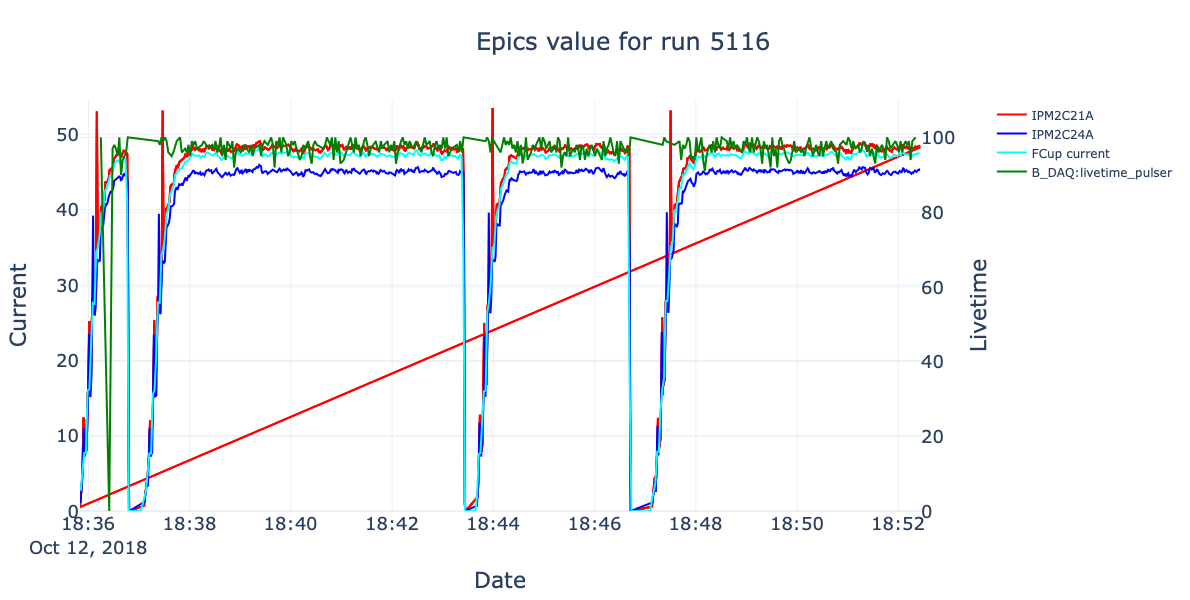

In [22]:
max_y_epics = np.max( [ipm2c21a["value"].max(), ipm2c24a["value"].max()])
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(height=600, width=1200, 
                  title=go.layout.Title(text=f"Epics value for run {data.All_Runs.iloc[i_run].name}", xanchor="left", x=0.4),
                  titlefont=dict(size=24),)
plot_trace(ipm2c21a, name="IPM2C21A",color="red")
plot_trace(ipm2c24a,name="IPM2C24A",color="blue")
plot_trace(fcup_current,name="FCup current",color="aqua")
plot_trace(livetime_pulser,"B_DAQ:livetime_pulser",color="green", secondary_y=True)
plot_trace(livetime,"B_DAQ:livetime",color="limegreen", secondary_y=True)
fig.update_xaxes(title_text="Date", titlefont=dict(size=22), tickfont=dict(size=18))
fig.update_yaxes(title_text="Current", titlefont=dict(size=22),range=[0., max_y_epics*1.02], tickfont=dict(size=18))
fig.update_yaxes(title_text="Livetime", titlefont=dict(size=22),range=[0., 110.], tickfont=dict(size=18), secondary_y=True)
fig.show()

## FCup Calculation Values
Inspect the values that go into the FCup current calculation. 

In [12]:
bsat = beam_stop_atten_time.index.get_indexer([start_time], method='nearest')
beam_stop_atten = beam_stop_atten_time.iloc[bsat]

scalerS2b = data.Mya.get(channel="scalerS2b", start=start_time, end=end_time, run_number=run_number)

fcup_offset = fcup_offset_time.loc[start_time:end_time]    # Get the FCup offset values.
fcup_prepend = fcup_offset_time.iloc[fcup_offset_time.index.get_indexer([start_time], method='ffill')] # Get one more before the start_time
fcup_prepend.index=[scalerS2b.iloc[0].time]                                                            # Reset the index of last fcup value to start_time
fcup_offset = pd.concat([fcup_prepend,fcup_offset])                                                    # Add the one value to the list.

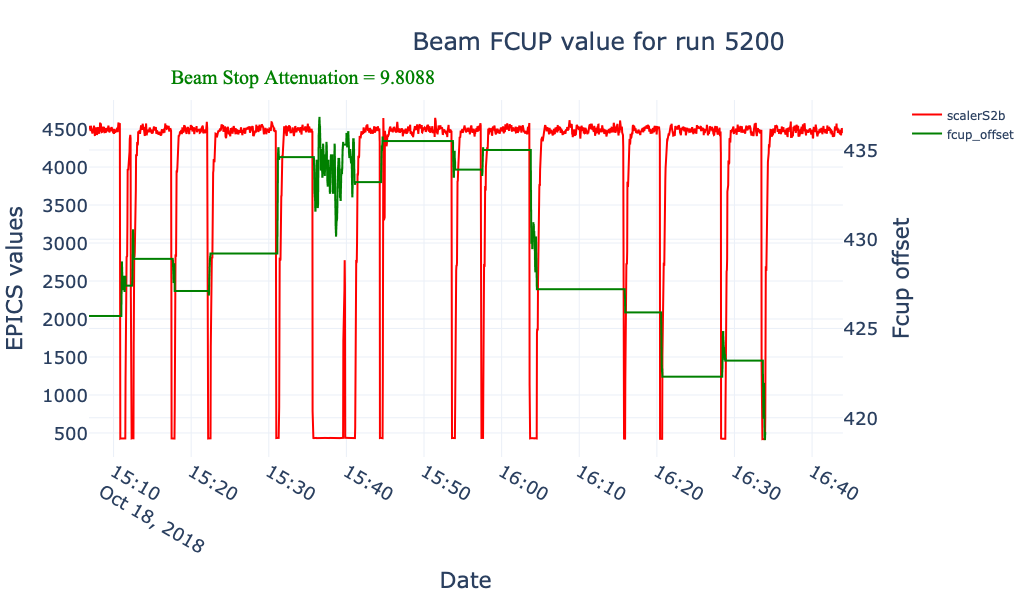

In [13]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(height=600, width=1200, 
                  title=go.layout.Title(text=f"Beam FCUP value for run {data.All_Runs.iloc[i_run].name}", xanchor="left", x=0.4),
                  titlefont=dict(size=24),)
fig.add_trace(go.Scatter(x=scalerS2b["time"], y=scalerS2b["value"], name="scalerS2b", line=dict(color="red")))
fig.add_trace(go.Scatter(x=fcup_offset.index, y=fcup_offset["value"], name="fcup_offset", line=dict(color="green"), line_shape='hv'), 
              secondary_y=True)
#fig.add_trace(go.Scatter(x=[scalerS2b.iloc[0].time, scalerS2b.iloc[-1].time], 
#                         y=[beam_stop_atten.value.mean(),beam_stop_atten.value.mean()], name="IPM2C24A", line=dict(color="limegreen")),
#                         secondary_y=True)
fig.update_xaxes(title_text="Date", titlefont=dict(size=22), tickfont=dict(size=18))
fig.update_yaxes(title_text="EPICS values", titlefont=dict(size=22), tickfont=dict(size=18))
fig.update_yaxes(title_text="Fcup offset ", titlefont=dict(size=22), tickfont=dict(size=18), secondary_y=True)
fig.add_annotation(x=0.1, y=1.1, xref='paper', yref='paper', text=f"Beam Stop Attenuation = {float(beam_stop_atten.value)}", showarrow=False,
                  font=dict(family="Times New Roman", size=20, color="green"))
fig.show()

In [19]:
data.debug=1
data.add_current_cor(run_number, current_channel="IPM2C21A")
data.add_current_cor(run_number, current_channel="IPM2C24A")
current = compute_fcup_current(run_number, data=data, current_channel="scalerS2b")
compute_fcup_current_livetime_correction(run_number, current=current, data=data)
data.All_Runs.loc[run_number:run_number, ["start_time","end_time", "B_DAQ:livetime_pulser", "Fcup_charge", "Fcup_charge_corr", "IPM2C21A_corr", "IPM2C24A_corr"]]

,start_time,end_time,B_DAQ:livetime_pulser,Fcup_charge,Fcup_charge_corr,IPM2C21A_corr,IPM2C24A_corr
number,,,,,,,
5200,2018-10-18 15:06:49,2018-10-18 16:43:58,4.237865e+08,0.220165,0.156554,0.160611,0.149712


## Check the FCup Sparsification routines
This checks if we are getting the FCup data correctly. To do so, we need to get the entire set of fcup_offset data, without the sparsification. This will take a bit of time to load, especially if it is not available in the cache, or if you add no_cache=True. In that case, it will fetch 1M data points from epicsweb.

There is no need to run these cells, unless you want to double check the input to the cells in the graph above.

In [15]:
beam_stop_atten_time, fcup_offset_time = initialize_fcup_param([datetime(2018, 2,  1, 0, 0),datetime(2019,  4, 15, 6, 0)], data=data, override=True)

MyaData: WARNING- asking from cache before start: 2018-02-01 00:00:00 < 2018-09-27 01:00:00
MyaData: WARNING - asking from cache after end: 2019-04-15 06:00:00 > 2018-11-26 07:00:00


In [16]:
# Test of fcup_offset sparsification
# First: Get an index for the fcup_offset at each time for the scalerS2b where there is beam: value>600, finding the previous fcup_offset value.
fcup_offset_indexes = fcup_offset_time.index.get_indexer(scalerS2b[scalerS2b.value>1000].time.to_list(), method="ffill")
# Make a new dataframe of all these fcup_offset, dropping ones with duplicate values.
fcup_offset_sparse_tmp = fcup_offset_time.iloc[fcup_offset_indexes]
fcup_offset_sparse = pd.concat([fcup_offset_sparse_tmp.iloc[0:1],fcup_offset_sparse_tmp[((fcup_offset_sparse_tmp.shift().value - fcup_offset_sparse_tmp.value).abs() > 0.01)]])

In [17]:
len(scalerS2b), len(fcup_offset_indexes), len(fcup_offset_sparse_tmp), len(fcup_offset_sparse)

(2779, 2517, 2517, 16)

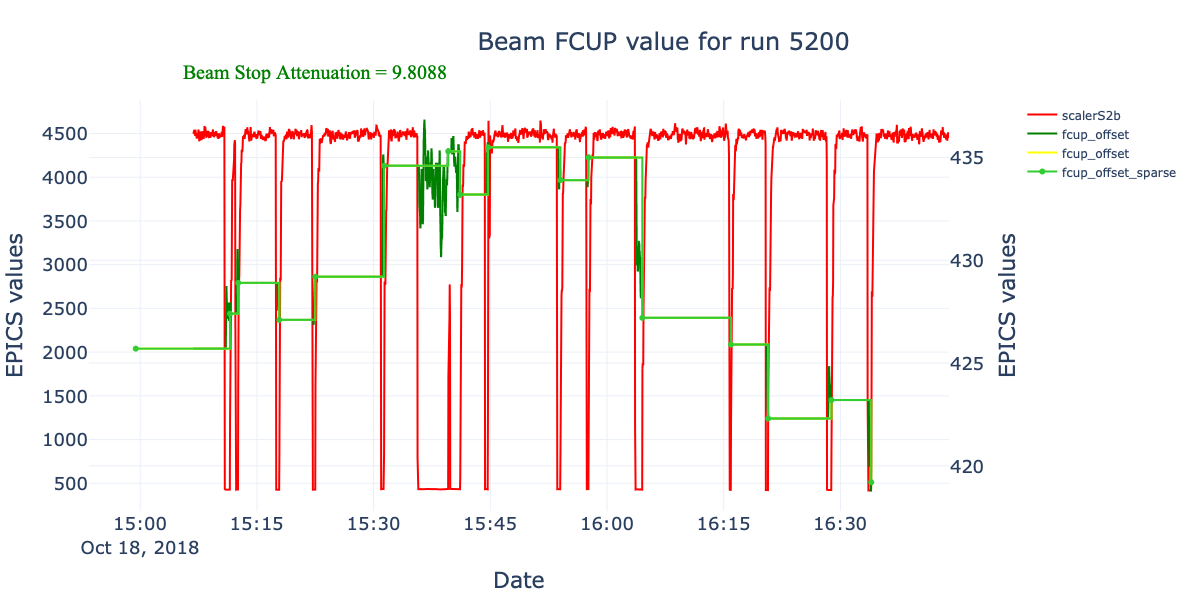

In [18]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(height=600, width=1200, 
                  title=go.layout.Title(text=f"Beam FCUP value for run {data.All_Runs.iloc[i_run].name}", xanchor="left", x=0.4),
                  titlefont=dict(size=24),)
fig.add_trace(go.Scatter(x=scalerS2b["time"], y=scalerS2b["value"], name="scalerS2b", line=dict(color="red")))
fig.add_trace(go.Scatter(x=fcup_offset.index, y=fcup_offset["value"], name="fcup_offset", line=dict(color="green"), line_shape='hv'), 
              secondary_y=True)
fig.add_trace(go.Scatter(x=fcup_offset_sparse_tmp.index, y=fcup_offset_sparse_tmp["value"], name="fcup_offset", line=dict(color="yellow"), line_shape='hv'), 
              secondary_y=True)
fig.add_trace(go.Scatter(x=fcup_offset_sparse.index, y=fcup_offset_sparse["value"], name="fcup_offset_sparse", line=dict(color="limegreen"), line_shape='hv'), 
              secondary_y=True)
#fig.add_trace(go.Scatter(x=[scalerS2b.iloc[0].time, scalerS2b.iloc[-1].time], 
#                         y=[beam_stop_atten.value.mean(),beam_stop_atten.value.mean()], name="IPM2C24A", line=dict(color="limegreen")),
#                         secondary_y=True)
fig.update_xaxes(title_text="Date", titlefont=dict(size=22), tickfont=dict(size=18))
fig.update_yaxes(title_text="EPICS values", titlefont=dict(size=22), tickfont=dict(size=18))
#fig.update_yaxes(title_text="Livetime", titlefont=dict(size=22),range=[0., 110.], tickfont=dict(size=18), secondary_y=True)
fig.add_annotation(x=0.1, y=1.1, xref='paper', yref='paper', text=f"Beam Stop Attenuation = {float(beam_stop_atten.value)}", showarrow=False,
                  font=dict(family="Times New Roman", size=20, color="green"))
fig.show()

In [2]:
livetime_pulser_long = data.Mya.get(channel="B_DAQ:livetime_pulser", start=datetime(2018,10,12,0,0), end=(2018,10,12,19,0), no_cache=True)

Error, could not get the data for channel: B_DAQ:livetime_pulser
Webserver responded with status:  400
Where your CUE login credential typed correctly? 


ConnectionError: [Errno Could not connect to ] https://epicsweb.jlab.org/myquery/interval

In [38]:
start_time, end_time

(Timestamp('2018-10-12 18:35:49'), Timestamp('2018-10-12 18:52:27'))

In [3]:
from RunData import MyaData

In [8]:
mya = MyaData(username="holtrop", password = "Peu1@.*fL4!xMjhgveC")

In [16]:
lt_p_l = data.Mya.get(channel="IPM2C21A", start=datetime(2018,10,12,0,0), end=datetime(2018,10,12,19,0), no_cache=True)

Fetching channel 'IPM2C21A'
Asking for data: https://epicsweb.jlab.org/myquery/interval params={'c': 'IPM2C21A', 'b': datetime.datetime(2018, 10, 12, 0, 0), 'e': datetime.datetime(2018, 10, 12, 19, 0), 'm': 'history', 't': 'event', 'u': 'on', 'a': 'on'}
Number of data points returned = 21531


In [15]:
ipm2c21a = data.Mya.get(channel="IPM2C21A", start=start_time, end=end_time, run_number=99998)

Fetching channel 'IPM2C21A'
Asking for data: https://epicsweb.jlab.org/myquery/interval params={'c': 'IPM2C21A', 'b': Timestamp('2018-10-12 18:35:49'), 'e': Timestamp('2018-10-12 18:52:27'), 'm': 'history', 't': 'event', 'u': 'on', 'a': 'on'}
Number of data points returned = 765


In [9]:
data.Mya.debug

6

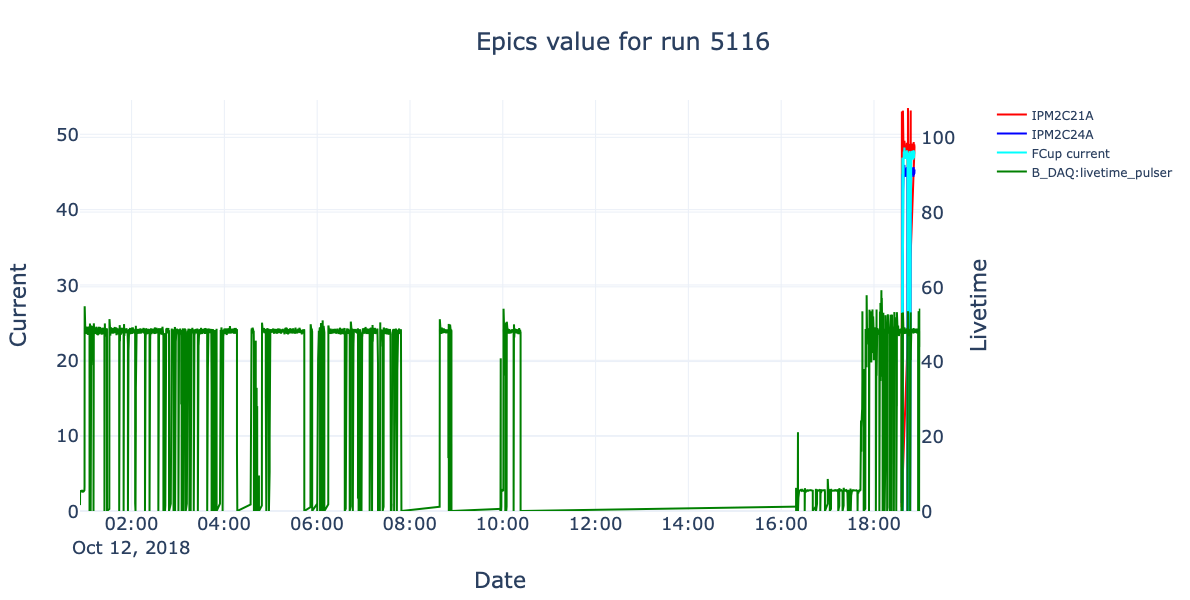

In [23]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(height=600, width=1200, 
                  title=go.layout.Title(text=f"Epics value for run {data.All_Runs.iloc[i_run].name}", xanchor="left", x=0.4),
                  titlefont=dict(size=24),)
plot_trace(ipm2c21a, name="IPM2C21A",color="red")
plot_trace(ipm2c24a,name="IPM2C24A",color="blue")
plot_trace(fcup_current,name="FCup current",color="aqua")
plot_trace(lt_p_l,"B_DAQ:livetime_pulser",color="green", secondary_y=True)
fig.update_xaxes(title_text="Date", titlefont=dict(size=22), tickfont=dict(size=18))
fig.update_yaxes(title_text="Current", titlefont=dict(size=22),range=[0., max_y_epics*1.02], tickfont=dict(size=18))
fig.update_yaxes(title_text="Livetime", titlefont=dict(size=22),range=[0., 110.], tickfont=dict(size=18), secondary_y=True)
fig.show()